# MACHINE LEARNING PROJECT

Nous proposons d'étudier et d'établir un algorithme de machine learning pour prédire le cours de l'indice S&P500

- Lianghe Dai
- Léo Dalbin
- Mathis Nguyen
- Xavier Toisoul
- Eliot Vu


# IMPORT PACKAGES

In [ ]:
pip install ta
# pip install pingouin

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=da1cc4030dcb7b36bd7ec99ee00b8193ef4b2bcab8d7fcabda0a3763de989651
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
# Financial Packages :
import yfinance as yf
import ta

# Mathematical Packages :
import numpy as np
import pandas as pd

# Plotting Packages :
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

# Statistical Packages
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import scipy.stats as stats
import pingouin as pg

# DATA : Collection, Viewing, Cleaning

## Collect Data from Yahoo Finance



- Defining the ticker of the asset
- Choising a Time Frame for the Price Prediction

In [ ]:
asset =['^GSPC', '^IXIC','TSLA', 'LOTB.BR', 'MC.PA', 'BLK', 'AAPL']
macro_indicators = ['DX-Y.NYB', '^VIX', '^TNX', 'CL=F', 'GC=F']
tickers=asset + macro_indicators
timeframe = '1d'
backtest_period = '5y'

- Collecting Data

In [ ]:
data = yf.download(tickers=tickers,
                         period=backtest_period,
                         interval=timeframe)

[*********************100%***********************]  12 of 12 completed


## Viewing Data Info (what it contains)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1294 entries, 2020-01-02 to 2025-01-02
Data columns (total 72 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (Adj Close, AAPL)      1259 non-null   float64
 1   (Adj Close, BLK)       1259 non-null   float64
 2   (Adj Close, CL=F)      1259 non-null   float64
 3   (Adj Close, DX-Y.NYB)  1259 non-null   float64
 4   (Adj Close, GC=F)      1259 non-null   float64
 5   (Adj Close, LOTB.BR)   1284 non-null   float64
 6   (Adj Close, MC.PA)     1284 non-null   float64
 7   (Adj Close, TSLA)      1259 non-null   float64
 8   (Adj Close, ^GSPC)     1259 non-null   float64
 9   (Adj Close, ^IXIC)     1259 non-null   float64
 10  (Adj Close, ^TNX)      1259 non-null   float64
 11  (Adj Close, ^VIX)      1259 non-null   float64
 12  (Close, AAPL)          1259 non-null   float64
 13  (Close, BLK)           1259 non-null   float64
 14  (Close, CL=F)          1259 non-null  

In this dataset, we have, for each asset (S&P500, VIX, 10Y Yield) :
- 6 columns : The OHLC Price (Open, High, Low, Close), the OHLC Price and the Volume
- We have historic price from 2019 to 2024

## Cleaning Data

- We check NaN Values

In [ ]:
row, column = np.where(pd.isna(data))
print(list(zip(row, column)))

[(12, 0), (12, 1), (12, 2), (12, 3), (12, 4), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (12, 12), (12, 13), (12, 14), (12, 15), (12, 16), (12, 19), (12, 20), (12, 21), (12, 22), (12, 23), (12, 24), (12, 25), (12, 26), (12, 27), (12, 28), (12, 31), (12, 32), (12, 33), (12, 34), (12, 35), (12, 36), (12, 37), (12, 38), (12, 39), (12, 40), (12, 43), (12, 44), (12, 45), (12, 46), (12, 47), (12, 48), (12, 49), (12, 50), (12, 51), (12, 52), (12, 55), (12, 56), (12, 57), (12, 58), (12, 59), (12, 60), (12, 61), (12, 62), (12, 63), (12, 64), (12, 67), (12, 68), (12, 69), (12, 70), (12, 71), (32, 0), (32, 1), (32, 2), (32, 3), (32, 4), (32, 7), (32, 8), (32, 9), (32, 10), (32, 11), (32, 12), (32, 13), (32, 14), (32, 15), (32, 16), (32, 19), (32, 20), (32, 21), (32, 22), (32, 23), (32, 24), (32, 25), (32, 26), (32, 27), (32, 28), (32, 31), (32, 32), (32, 33), (32, 34), (32, 35), (32, 36), (32, 37), (32, 38), (32, 39), (32, 40), (32, 43), (32, 44), (32, 45), (32, 46), (32, 47), (32, 48), (32, 

- Let's clean the dataset

In [ ]:
# Drop NaN Values
clean_data = data.dropna(inplace=False)

# Drop Duplicated Values
clean_data = clean_data[~clean_data.index.duplicated(keep='first')]

## Log Returns

In [ ]:
#For Each Asset/Tickers
for ticker in tickers :

    # We Compute the Log Returns
    clean_data['Log Returns', ticker] = 100*np.log(clean_data['Adj Close', ticker]/clean_data['Adj Close', ticker].shift(-1))

# Cleaning the latest value that is a NaN Value
clean_data = clean_data.dropna()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Augmented Dickey-Fuller test

In [ ]:
adf_resulsts = adfuller(clean_data['Log Returns', '^GSPC'])

print(
    f"Statistique ADF : {round(adf_resulsts[0],2)} \n"
    f"p-value : {round(adf_resulsts[1],20)} \n"
    f"Lags utilisés : {adf_resulsts[2]} \n"
    f"Valeurs critiques : \n"
    f"  - À 1% : {adf_resulsts[4]['1%']} \n"
    f"  - À 5% : {adf_resulsts[4]['5%']} \n"
    f"  - À 10% : {adf_resulsts[4]['10%']} \n"
    f"Maximized Information Criterion (AIC) : {adf_resulsts[5]}"
    )

Statistique ADF : -32.24 
p-value : 0.0 
Lags utilisés : 0 
Valeurs critiques : 
  - À 1% : -3.4366231443991118 
  - À 5% : -2.864309749608104 
  - À 10% : -2.568244725395481 
Maximized Information Criterion (AIC) : 2976.853799437578


### Saving ADF Test Results

In [ ]:
adf_resulsts_dict = {
    "Statistique ADF" : round(adf_resulsts[0],2),
    "p-value" : round(adf_resulsts[1],20),
    "Lags utilisés" : adf_resulsts[2],
    "Valeurs critiques" :
        {
            " - À 1%" : adf_resulsts[4]['1%'],
            "  - À 5%" : adf_resulsts[4]['5%'],
            "  - À 10%" : adf_resulsts[4]['10%'],
        },
    "Maximized Information Criterion (AIC)" : adf_resulsts[5],
}
adf_resulsts_dict

{'Statistique ADF': -10.3,
 'p-value': 3.45e-18,
 'Lags utilisés': 8,
 'Valeurs critiques': {' - À 1%': -3.4356474307506084,
  '  - À 5%': -2.8638793281844253,
  '  - À 10%': -2.5680154897465575},
 'Maximized Information Criterion (AIC)': 4089.5842400883294}

- We could use a lag of 8
- Let's use the ACF function to cross information

## Autocorrelation Function (ACF)

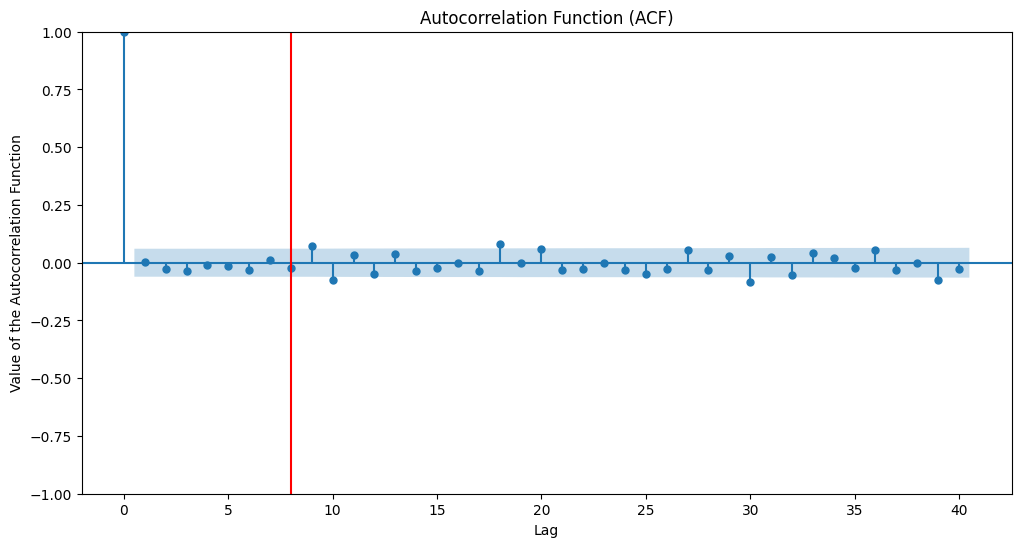

In [ ]:
plt.figure(figsize=(12, 6))
plot_acf(clean_data['Log Returns', '^GSPC'], lags=40, ax=plt.gca())
plt.vlines(x=8, ymin=-1, ymax=1, color='r', linestyle='-', label="ADF Lag")
plt.xlabel("Lag")
plt.ylabel("Value of the Autocorrelation Function")
plt.title('Autocorrelation Function (ACF)')
plt.show()

## Partial Autocorrelation Function (PACF)

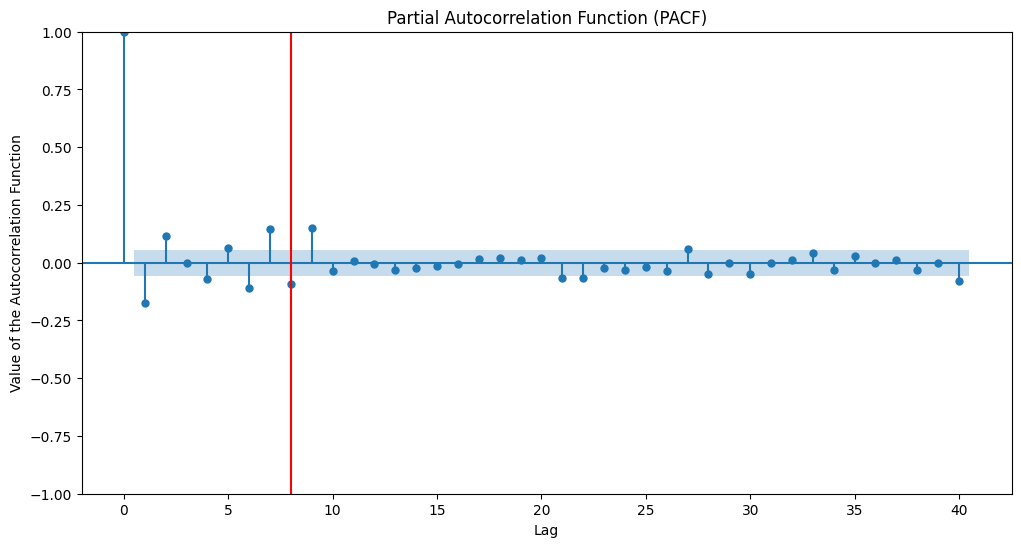

In [ ]:
plt.figure(figsize=(12, 6))
plot_pacf(clean_data['Log Returns', '^GSPC'], lags=40, ax=plt.gca())
plt.vlines(x=8, ymin=-1, ymax=1, color='r', linestyle='-', label="ADF Lag")
plt.xlabel("Lag")
plt.ylabel("Value of the Autocorrelation Function")
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

- Finally, a lag of 9 seems the best choice

# INDICATORS

## Source of Indicators and Asset

In [ ]:
src = 'Adj Close'
asset = '^GSPC'

## Moving Average Convergence Divergence (MACD)

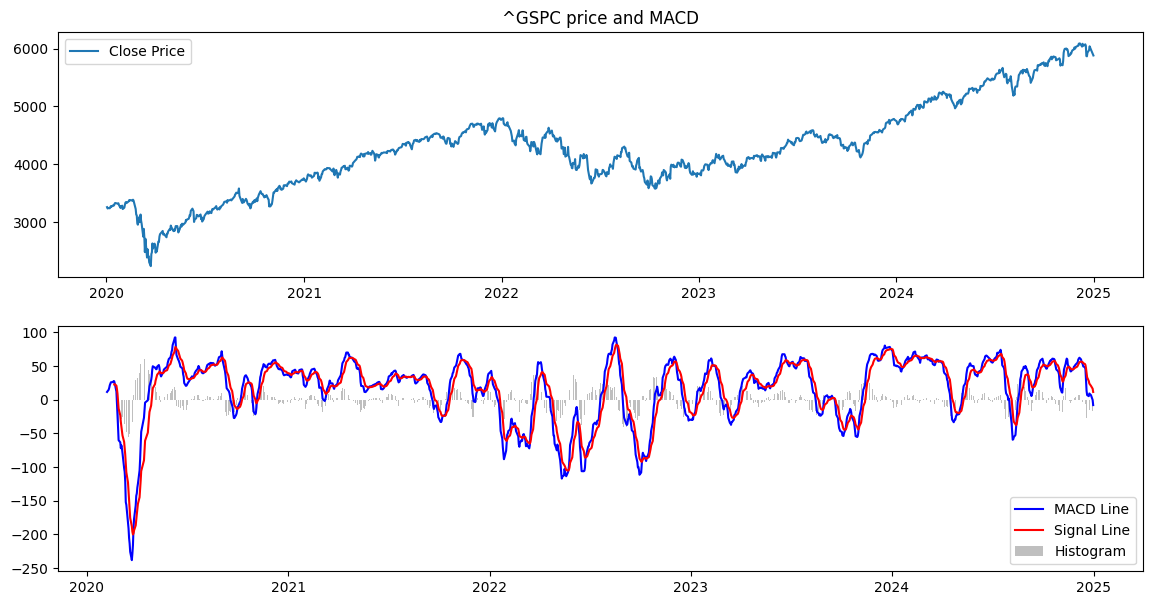

In [ ]:
# Creating MACD Function
def MACD(data, tickers, src):

  # For each asset
  for asset in tickers:

    # Creating the MACD Indicator with Technical Analysis (ta package)
    macd = ta.trend.MACD(data[src, asset])
    data[f'MACD_{asset}', 'MACD'] = macd.macd()
    data[f'MACD_{asset}', 'MACD_Signal'] = macd.macd_signal()
    data[f'MACD_{asset}', 'MACD_Diff'] = macd.macd_diff()

# Creating MACD Indicator
MACD(clean_data, tickers, src)

plt.figure(figsize=(14,7))

# Plotting Close Price
plt.subplot(2,1,1)
plt.plot(clean_data[src, asset],label='Close Price')
plt.title(f'{asset} price and MACD')
plt.legend()

# Plottinf MACD
plt.subplot(2,1,2)
plt.plot(clean_data[f'MACD_{asset}', 'MACD'],label='MACD Line',color='blue')
plt.plot(clean_data[f'MACD_{asset}', 'MACD_Signal'], label='Signal Line', color='red')
plt.bar(clean_data.index, clean_data[f'MACD_{asset}', 'MACD_Diff'],label='Histogram',color='grey',alpha=0.5)
plt.legend()

plt.show()

## Relative Strenght Index (RSI)

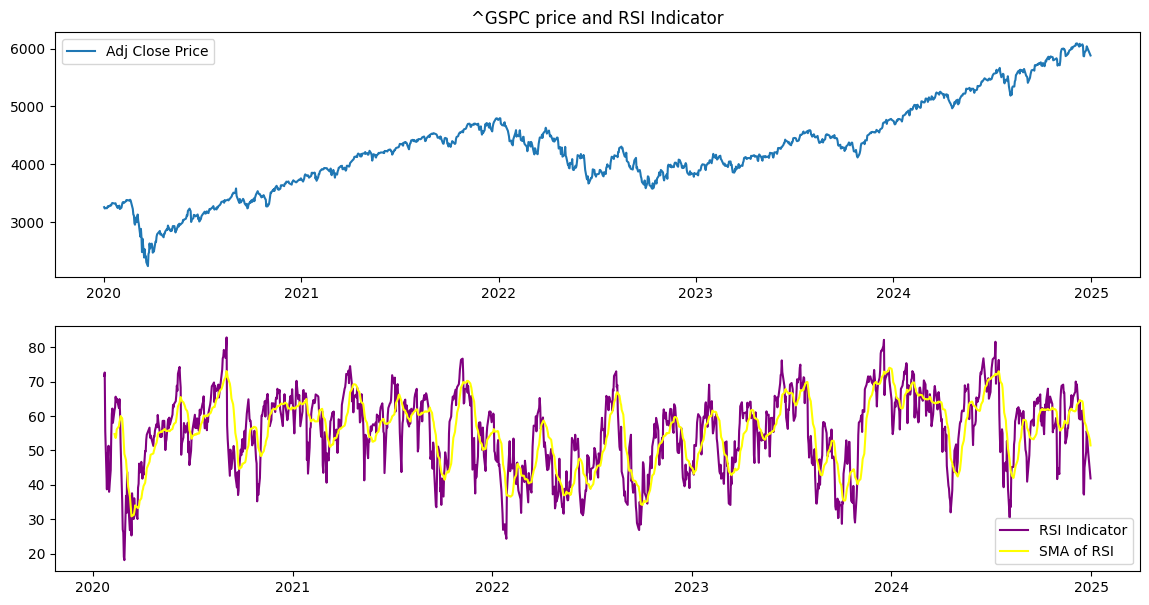

In [ ]:
# Creating RSI Function
def RSI(data, tickers, src, window=14):

  # For each asset
  for asset in tickers:

    # Creating the RSI Indicator with Technical Analysis (ta package)
    data[asset, 'RSI'] = ta.momentum.RSIIndicator(data[src, asset], window=window).rsi()
    data[asset, 'SMA_RSI'] = data[asset, 'RSI'].rolling(window=window).mean()


# Default Value
window = 14

# Creating RSI Indicator
RSI(clean_data, tickers, src, window)

plt.figure(figsize=(14,7))

# Plotting Close Price
plt.subplot(2,1,1)
plt.plot(clean_data[src, asset],label='Adj Close Price')
plt.title(f'{asset} price and RSI Indicator')
plt.legend()

# Plotting RSI
plt.subplot(2,1,2)
plt.plot(clean_data[asset, 'RSI'],label='RSI Indicator',color='purple')
plt.plot(clean_data[asset, 'SMA_RSI'],label='SMA of RSI',color='yellow')
plt.legend()

plt.show()

## Simple Moving Average (SMA)

<ipython-input-149-26aca25586fa>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'MA_{lenght}'] = data[src, asset].rolling(window=lenght).mean()
<ipython-input-149-26aca25586fa>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'MA_{lenght}'] = data[src, asset].rolling(window=lenght).mean()
<ipython-input-149-26aca25586fa>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at o

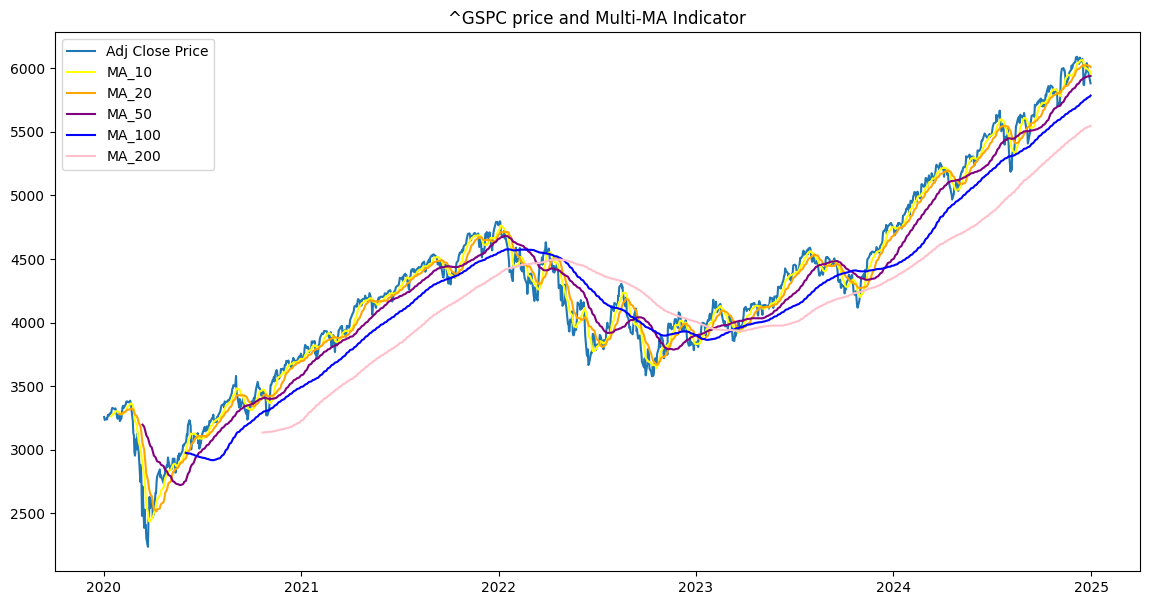

In [ ]:
#Multi_MA Function
def Multi_MA(data, tickers, src, Lenght_MA):

  # For each asset
  for asset in tickers:
      # Creating the Multi-MA with Technical Analysis (ta package)
      for lenght in Lenght_MA:
          data[asset, f'MA_{lenght}'] = data[src, asset].rolling(window=lenght).mean()

# Default Values
Lenght_MA = [10, 20, 50, 100, 200]

# Creating Multi_MA Indicator
Multi_MA(clean_data, tickers, src, Lenght_MA)

plt.figure(figsize=(14,7))

# Plotting Close Price & Multi-MA
plt.plot(clean_data[src, asset],label='Adj Close Price')
plt.plot(clean_data[asset, 'MA_10'],label='MA_10',color='yellow')
plt.plot(clean_data[asset, 'MA_20'],label='MA_20',color='orange')
plt.plot(clean_data[asset, 'MA_50'],label='MA_50',color='purple')
plt.plot(clean_data[asset, 'MA_100'],label='MA_100',color='blue')
plt.plot(clean_data[asset, 'MA_200'],label='MA_200',color='pink')
plt.title(f'{asset} price and Multi-MA Indicator')
plt.legend()

plt.show()

## Bollinger Bands

<ipython-input-150-e66426259884>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'SMA_{window}'] = data[src, asset].rolling(window=window).mean()
<ipython-input-150-e66426259884>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[asset, f'STD_{window}'] = data[src, asset].rolling(window=window).std()
<ipython-input-150-e66426259884>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns a

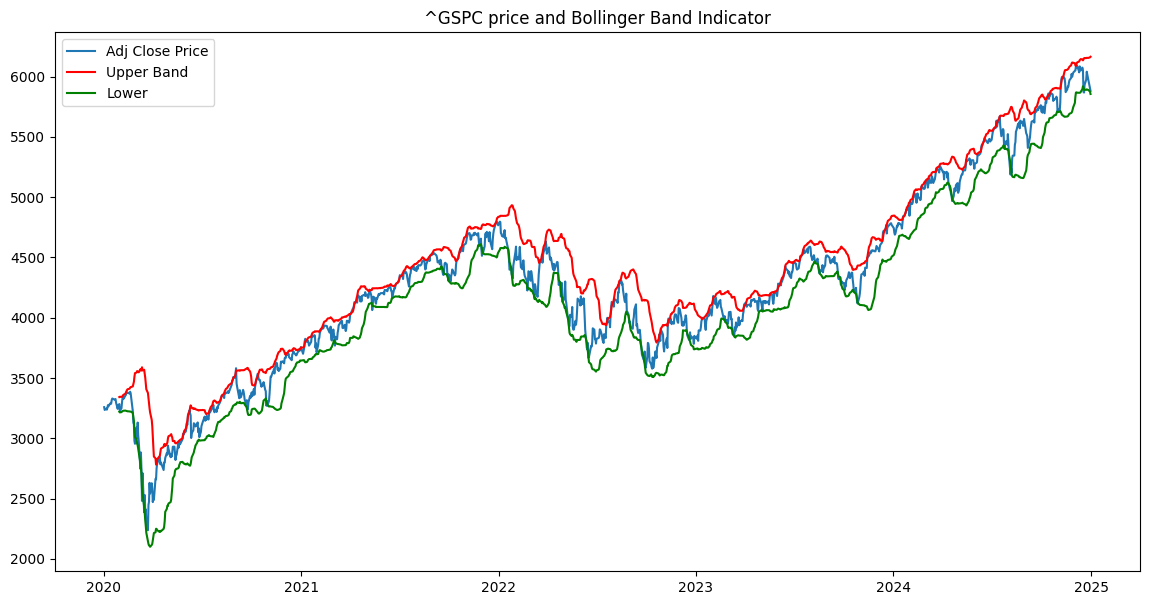

In [ ]:
# Creating Bollinger Bands Function
def BB(data, tickers, src, window):

  # For each asset
  for asset in tickers:

      # SMA sur 20 jours
      data[asset, f'SMA_{window}'] = data[src, asset].rolling(window=window).mean()

      # Écart-type sur 20 jours
      data[asset, f'STD_{window}'] = data[src, asset].rolling(window=window).std()

      # Creating the Bollinger Bands Indicator
      data[asset, 'Upper_Band'] = data[asset, f'SMA_{window}'] + (2 * data[asset, f'STD_{window}'])
      data[asset, 'Lower_Band'] = data[asset, f'SMA_{window}'] - (2 * data[asset, f'STD_{window}'])

#Default Value
window = 20

# Creating Bollinger Bands Indicator
BB(clean_data, tickers, src, window)

plt.figure(figsize=(14,7))

# Plotting Close Price & Multi-MA
plt.plot(clean_data[src, asset],label='Adj Close Price')
plt.plot(clean_data[asset, 'Upper_Band'],label='Upper Band',color='red')
plt.plot(clean_data[asset, 'Lower_Band'],label='Lower',color='green')
plt.title(f'{asset} price and Bollinger Band Indicator')
plt.legend()

plt.show()

## Cleaning Data

In [ ]:
## Indicators created new NaN Values

# Drop NaN Values
clean_data = clean_data.dropna(inplace=False)

# Drop Duplicated Values
clean_data = clean_data[~clean_data.index.duplicated(keep='first')]

# CORRELATION


## Correlation between all data

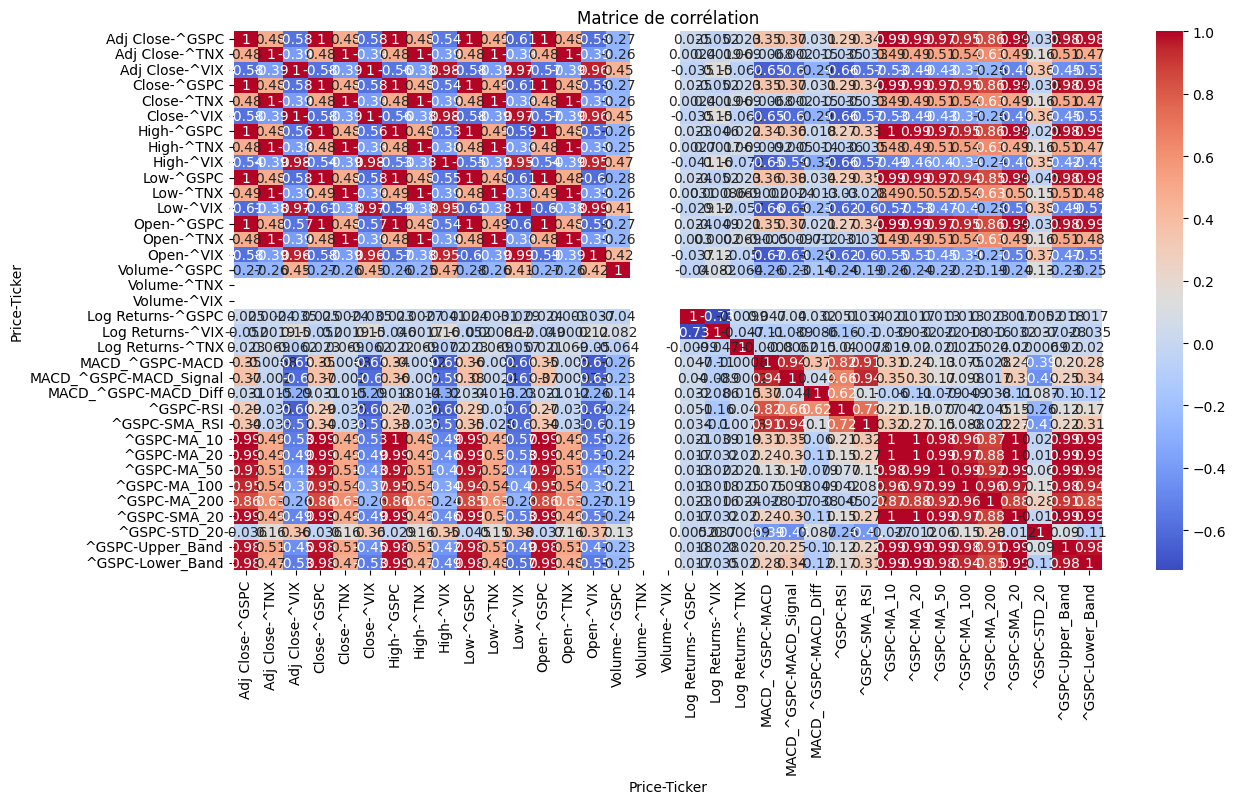

In [ ]:
# Matrice de corrélation
corr_matrix = clean_data.corr()
plt.figure(figsize=(14,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# Example: Calculating the partial correlation between two variables, controlling for a third
partial_corr = pg.partial_corr(data=clean_data, x=('Adj Close','^GSPC'), y=('Adj Close' ,'^VIX'), covar =('^GSPC' ,'Upper_Band'))
print(partial_corr)

            n         r           CI95%          p-val
pearson  1046 -0.724217  [-0.75, -0.69]  1.482311e-170


# EVALUATION FUNCTIONS

## MSE & MAE

In [ ]:
def evaluation_rmse_mae(model, X_train, y_train, y_test, y_pred):

  # Evaluate the model
  mse_train = mean_squared_error(y_train, model.predict(X_train))
  mae_train = mean_absolute_error(y_train, model.predict(X_train))
  mse_pred = mean_squared_error(y_test, y_pred)
  mae_pred = mean_absolute_error(y_test, y_pred)
  mse_pred_naive = mean_squared_error(pd.DataFrame(y_test).drop(0), pd.DataFrame(y_test).shift(1).drop(0))
  mae_pred_naive = mean_absolute_error(pd.DataFrame(y_test).drop(0), pd.DataFrame(y_test).shift(1).drop(0))

  xlabel = ['MSE', 'MAE', 'MSE Ratio']
  bar_width = 0.20
  index = np.arange(len(xlabel))
  plt.bar(index,
    [mse_train, mae_train, mse_pred/mse_train],
    bar_width,
    color='orange',
    label='Train Data')

  plt.bar(index + bar_width,
    [mse_pred, mae_pred, mae_pred/mae_train],
    bar_width,
    color='red',
    label='Test Data')

  plt.bar(index + 2*bar_width,
    [mse_pred_naive, mae_pred_naive, 0],
    bar_width,
    color='White',
    edgecolor='black',
    label='Naive Method')

  plt.xlabel('Metrics')
  plt.ylabel('Value of Metrics')
  plt.title("Use MSE, MAE and Ratio to Detect a Potentiel Overfiting &" + "\n" + "Compare Performance with a Naive Model")
  plt.xticks(index + bar_width / 2, labels=xlabel)
  plt.legend()
  plt.figure(figsize=(8, 6))

  print(f"Mean Squared Error (MSE), for Train: {mse_train}")
  print(f"Mean Absolute Error (MAE), for Train: {mae_train} \n")
  print(f"Mean Squared Error (MSE), for Test: {mse_pred}")
  print(f"Mean Absolute Error (MAE), for Test: {mae_pred} \n")
  print(f"Mean Squared Error (MSE), naive methode: {mse_pred_naive}")
  print(f"Mean Absolute Error (MAE), naive methode: {mae_pred_naive} \n")
  print(f"MSE Ratio : MSE Prediction over MSE Train (MSER): {mse_pred/mse_train}")
  print(f"MAE Ratio : MAE Prediction over MAE Train (MAER): {mae_pred/mae_train}")

# RANDOM FOREST

## Import Packages

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score

In [ ]:
# for i in range(adf_resulsts_dict['Lags utilisés'], 2*adf_resulsts_dict['Lags utilisés']):
for i in range(9, 18):
    clean_data[f'PreviousClose{i}', asset] = clean_data['Close', asset].shift(i)
    clean_data[f'PreviousOpen{i}', asset] = clean_data['Open', asset].shift(i)
    clean_data[f'PreviousHigh{i}', asset] = clean_data['High', asset].shift(i)
    clean_data[f'PreviousLow{i}', asset] = clean_data['Low', asset].shift(i)
    clean_data[f'PreviousVolume{i}', asset] = clean_data['Volume', asset].shift(i)
    clean_data[f'PreviousAdj Close{i}', asset] = clean_data['Adj Close', asset].shift(i)
    clean_data[f'PreviousLog Returns{i}', asset] = clean_data['Log Returns', asset].shift(i)

In [ ]:
clean_data['Year'] = clean_data.index.year
clean_data['Month'] = clean_data.index.month
clean_data['Day'] = clean_data.index.day
clean_data['DayOfWeek'] = clean_data.index.dayofweek
clean_data['EndOfYear'] = clean_data.index.is_year_end

date_data = clean_data.index

In [ ]:
# On divise les données en X et y
X = clean_data.drop(columns=['Log Returns', '^GSPC'])  # On supprime la colonne de date et la cible

y = clean_data['Log Returns', '^GSPC']  # On utilise le cours d'ouverture comme notre y

index = int(len(clean_data) * 0.8) # On prend 80% des données pour l'entrainement

date_data = date_data[index:]

RMSE: 1.1076137528092407
Normalized RMSE: -11.981596569440956
Mean Absolute Error: 0.9293405045661132


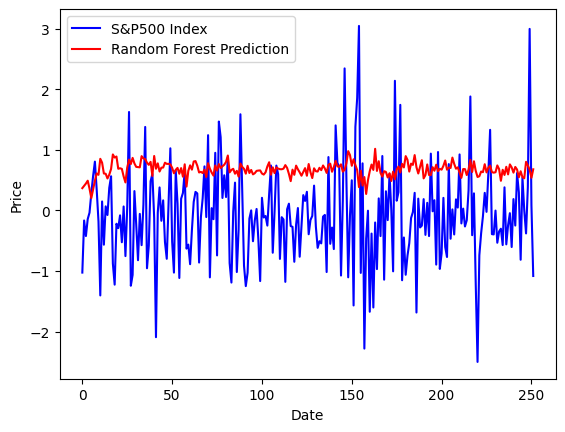

In [ ]:
# On divise les données en ensembles d'entraînement et de test

X_train = X[:index]
X_test = X[index:]
y_train = y[:index]
y_test = y[index:]

# On entraîne le modèle Random Forest avec bootstrapping
model = RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

# We Compute the Root Mean Squared Error (RMSE), the Mean Absolute Error (MAE) and the Accuracy
random_forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
random_forest_n_rmse= random_forest_rmse / y_test.mean()
random_forest_mae = mean_absolute_error(y_test, y_pred)
# random_forest_accuray = accuracy_score(y_test, y_pred)

random_forest_metrics = {
    "RMSE" : random_forest_rmse,
    "Normalized RMSE" : random_forest_n_rmse,
    "MAE" : random_forest_mae
    # "Accuracy" : random_forest_accuray
}

print(f'RMSE: {random_forest_rmse}')
print(f'Normalized RMSE: {random_forest_n_rmse}')
print(f'Mean Absolute Error: {random_forest_mae}')
# print(f'Accuracy: {random_forest_accuray}')

plt.plot(y_test.values, 'b-')
plt.plot(y_pred, 'r-')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(["S&P500 Index", "Random Forest Prediction"])
# plt.vlines(x=index, ymin=y_test.values.min(), ymax=y_test.values.max(), color='r', linestyle='-')
plt.show()

# ARIMA

## Import Packages

In [ ]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.7 MB/s eta 0:00:00


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

## ARIMA : Model

### Spliting Data

In [ ]:
# Select the target column (time series to predict)
target_column = ('Log Returns', '^GSPC')  # Adjusted close price for S&P 500
time_series = clean_data[target_column]

# Split data into training and testing sets
train_size = int(len(time_series) * 0.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

### Getting Parameters with Auto-ARIMA

In [ ]:
# Ajustement du modèle avec auto_arima
model = auto_arima(train_data,
                   start_p=1, start_q=1,
                   max_p=12, max_q=12,
                   seasonal=True,
                   m=12,  # Périodicité saisonnière (par exemple, données mensuelles)
                   trace=True,
                   stepwise=True)

# Récupérer les ordres
order = model.order
seasonal_order = model.seasonal_order

# Afficher les paramètres optimaux
print("Ordre non-saisonnier (p, d, q) :", order)
print("Ordre saisonnier (P, D, Q, s) :", seasonal_order)

### Model

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2542.707, Time=7.95 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2540.527, Time=0.04 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2540.907, Time=0.30 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2540.735, Time=0.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2539.954, Time=0.03 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=2538.918, Time=0.21 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2540.310, Time=0.68 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=2540.506, Time=1.12 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=2538.746, Time=0.27 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2540.404, Time=0.81 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=2541.899, Time=1.98 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2540.736, Time=0.37 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2540.881, Time=1.57 sec
 ARIMA(0,0,0)(0,0,1)[12]             : AIC=2538.389, Time=0.18 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[12]             : AIC=2540.202, Time=0.50 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(0,0,2)[12]             : AIC=2540.099, Time=0.39 sec
 ARIMA(0,0,0)(1,0,0)[12]             : AIC=2538.540, Time=0.11 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,2)[12]             : AIC=2541.585, Time=1.81 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,1)[12]             : AIC=2540.366, Time=0.61 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[12]             : AIC=2540.365, Time=0.84 sec


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,1)[12]             : AIC=2540.471, Time=2.09 sec

Best model:  ARIMA(0,0,0)(0,0,1)[12]          
Total fit time: 22.379 seconds
Ordre non-saisonnier (p, d, q) : (0, 0, 0)
Ordre saisonnier (P, D, Q, s) : (0, 0, 1, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                   
Dep. Variable:     ('Log Returns', '^GSPC')   No. Observations:                  843
Model:                 ARIMA(0, 0, [1], 12)   Log Likelihood               -1266.373
Date:                      Tue, 24 Dec 2024   AIC                           2538.746
Time:                              00:51:38   BIC                           2552.957
Sample:                                   0   HQIC                          2544.191
                                      - 843                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0448      0.035     -1.273      0.203      -0.114       0.024
ma.S.L12      -0.0686      0.032     -2.166      0.030      -0.131      -0.007
sigm

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


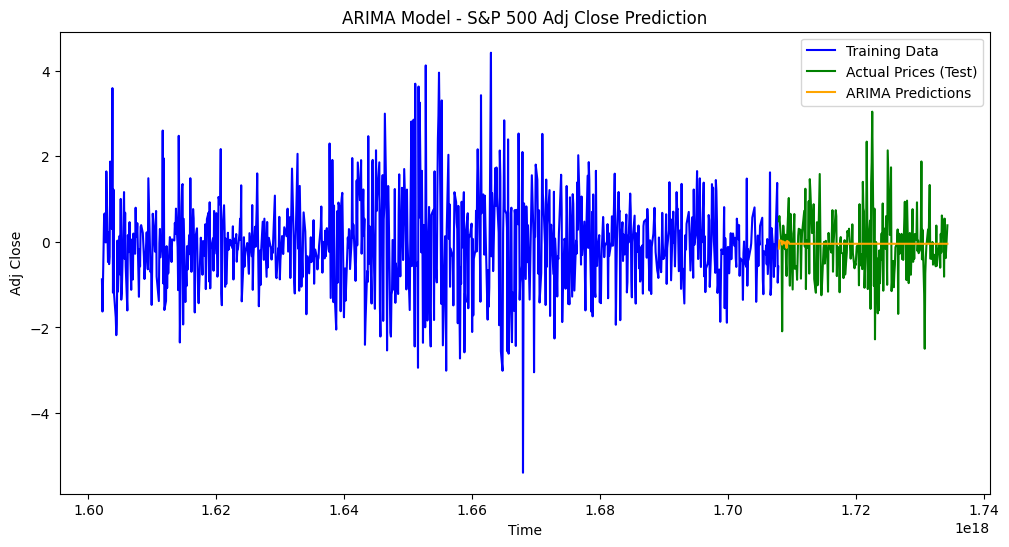

In [ ]:
# Fit ARIMA model
# Specify the (p, d, q) parameters for ARIMA
p, d, q = 5, 1, 2  # These can be tuned further
model = ARIMA(train_data, order=order, seasonal_order=seasonal_order)
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

# Make predictions
predictions = fitted_model.forecast(steps=len(test_data))
predictions = predictions.values.flatten()

### RMSE & MAE (Evaluation)

In [ ]:
# Evaluate the model
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

### Plotting Predictions

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Actual Prices (Test)', color='green')
plt.plot(test_data.index, predictions, label='ARIMA Predictions', color='orange')
plt.legend()
plt.title("ARIMA Model - S&P 500 Adj Close Prediction")
plt.xlabel("Time")
plt.ylabel("Adj Close")
plt.show()

# GRADIENT BOOSTING

## Import Packages

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

## GBoost : Model

### Data to Predict

In [ ]:
# Select features and target
gboost_asset = '^GSPC'
gboost_src = 'Adj Close'
gboost_target = clean_data[(gboost_src, gboost_asset)] # Targeted Data
# features = clean_data.drop(columns=[('Close', asset)]).values  # Other colomns as Features
gboost_features = clean_data[
    [
        ('Open', '^GSPC'),
        ('High', '^GSPC'),
        ('Low', '^GSPC'),
        ('Adj Close', 'DX-Y.NYB'),
        ('Adj Close', '^IXIC'),
        ('Adj Close', 'CL=F'),
        ('Adj Close', 'GC=F'),
        ('^GSPC', 'SMA_20'),
        ('^GSPC', 'Upper_Band'),
        ('^GSPC', 'Lower_Band'),
    ]
]  # Other colomns as Features

# Shift target for t+1 prediction
clean_data['Target_t+1'] = gboost_target.shift(-1)

# Drop the last row since we can't predict t+1 for the last observation
clean_data = clean_data.iloc[:-1]

# Redefine features and target
gboost_X = clean_data[gboost_features.columns]  # All input features
gboost_y = clean_data['Target_t+1']  # The shifted Adj Close

### Spliting Data

In [ ]:
# Train-test split
gboost_X_train, gboost_X_test, gboost_y_train, gboost_y_test = train_test_split(gboost_X, gboost_y, test_size=0.2, random_state=42)

### Model

In [ ]:
# Initialize Gradient Boosting Regressor
gboost_model = GradientBoostingRegressor(
    n_estimators=100,       # Reduce number of trees
    max_depth=3,            # Reduce tree depth
    learning_rate=0.1,      # Adjust learning rate
    subsample=0.8,          # Use a subset of the data for training each tree
    random_state=42
)

# Train the model
gboost_model.fit(gboost_X_train, gboost_y_train)

# Make predictions
gboost_y_pred = gboost_model.predict(gboost_X_test)

### RMSE & MAE (Evaluation)

In [ ]:
evaluation_rmse_mae(gboost_model, gboost_X_train, gboost_y_train, gboost_y_test, gboost_y_pred)

KeyError: '[0] not found in axis'

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(gboost_y_train, gboost_model.predict(gboost_X_train))
mae_train = mean_absolute_error(gboost_y_train, gboost_model.predict(gboost_X_train))
mse_pred = mean_squared_error(gboost_y_test, gboost_y_pred)
mae_pred = mean_absolute_error(gboost_y_test, gboost_y_pred)

print(f"Mean Squared Error (MSE), for Train: {mse_train}")
print(f"Mean Absolute Error (MAE), for Train: {mae_train}")
print(f"Mean Squared Error (MSE), for Test: {mse_pred}")
print(f"Mean Absolute Error (MAE), for Test: {mae_pred}")
print(f"Mean Absolute Error Ratio (MSER): {mse_pred/mse_train}")
print(f"Mean Absolute Error Ratio (MAER): {mae_pred/mae_train}")

Mean Squared Error (MSE), for Train: 1033.1062160681586
Mean Absolute Error (MAE), for Train: 25.16497462976574
Mean Squared Error (MSE), for Test: 2849.954753348085
Mean Absolute Error (MAE), for Test: 41.585232701424474
Mean Absolute Error Ratio (MSER): 2.7586270501735717
Mean Absolute Error Ratio (MAER): 1.6525044556268478


### Plotting Results

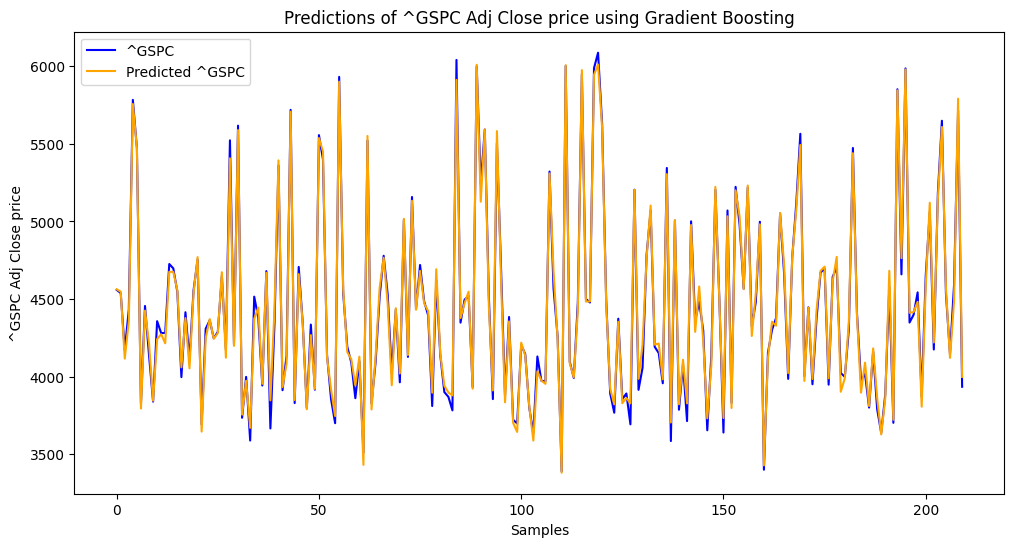

In [ ]:
# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(gboost_y_test.values, label=f'{gboost_asset}', color='blue')
plt.plot(gboost_y_pred, label=f"Predicted {gboost_asset}", color='orange')
plt.legend()
plt.title(f'Predictions of {gboost_asset} {gboost_src} price using Gradient Boosting')
plt.xlabel("Samples")
plt.ylabel(f"{gboost_asset} {gboost_src} price")
plt.show()

## GBoost : Cross-Validation

In [ ]:
# Define the custom scoring function (MSE)
mse_scorer = make_scorer(mean_squared_error)

# Perform 5-fold cross-validation for MSE
cv_scores = cross_val_score(gboost_model, gboost_X, gboost_y, cv=10, scoring=mse_scorer)

# Print the cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Average CV MSE: {cv_scores.mean()}")
print(f"Standard Deviation of CV MSE: {cv_scores.std()}")

# Cross-validation predictions
y_cv_pred = cross_val_predict(gboost_model, gboost_X, gboost_y, cv=10)

Cross-Validation MSE Scores: [11517.96514342  1067.42204698  2694.7111876   6803.41171054
  4699.51948419  2650.00587264  1580.02652812  2684.87790541
  3477.767286   93962.6389385 ]
Average CV MSE: 13113.834610341257
Standard Deviation of CV MSE: 27106.290151129324


**Interpretation of the Results :**

- Cross-Validation MSE Scores: The MSE values for the folds vary widely, from very low error to relatively high error. This variability suggests that the model's performance depends on the specific data in each fold.
- Average CV MSE: 0.0066815061 is relatively low, which indicates that, on average, the model performs well.
- Standard Deviation of CV MSE: 0.0122432188 is quite large compared to the average MSE, suggesting inconsistency in performance across the folds.

\

**The model performs well on average**, but its performance can be highly variable depending on the data it encounters. This might indicate:
- Sensitivity to certain data patterns: The model might struggle to generalize for specific subsets of the data.
- Potential overfitting: If the variability is due to noise in the dataset or spurious correlations.

## GBoost : Residuals

### Distribution and Scatter Plot

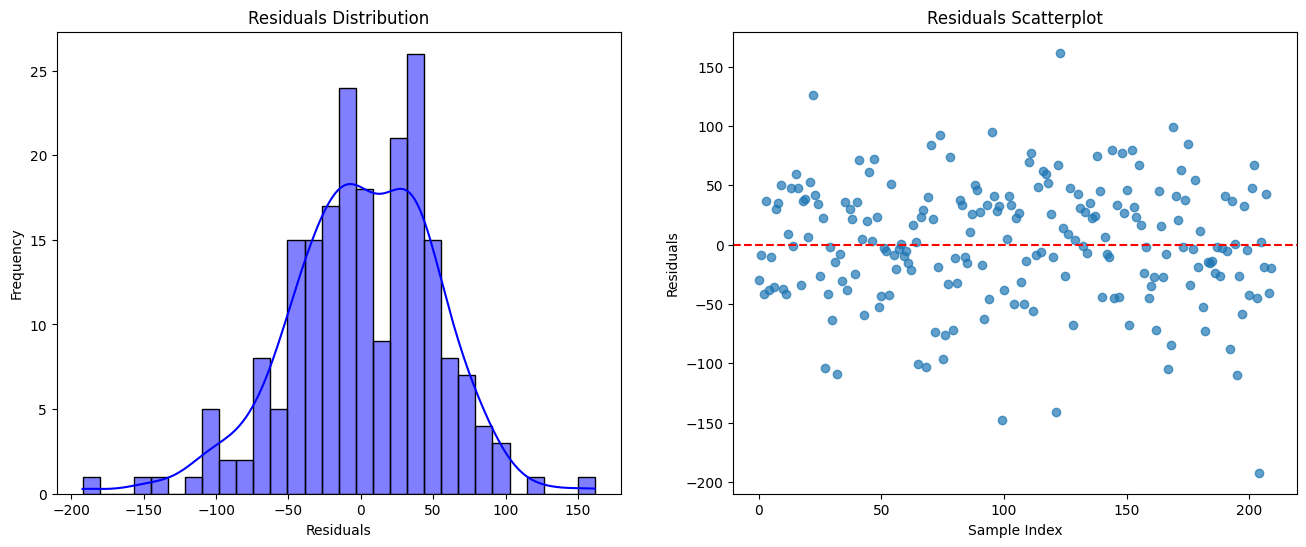

Mean of residuals: 1.2659931321164484
Standard deviation of residuals: 50.67830787018526


In [ ]:
# Calculate residuals
gboost_residuals = gboost_y_test - gboost_y_pred

# Size of Graphs
plt.figure(figsize=(16, 6))

# Residuals distribution
plt.subplot(1, 2, 1)
sns.histplot(gboost_residuals, kde=True, bins=30, color="blue")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals scatterplot
plt.subplot(1, 2, 2)
plt.scatter(range(len(gboost_residuals)), gboost_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Scatterplot")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")

plt.show()

# Normality check
print("Mean of residuals:", np.mean(gboost_residuals))
print("Standard deviation of residuals:", np.std(gboost_residuals))

### QQ-Plot

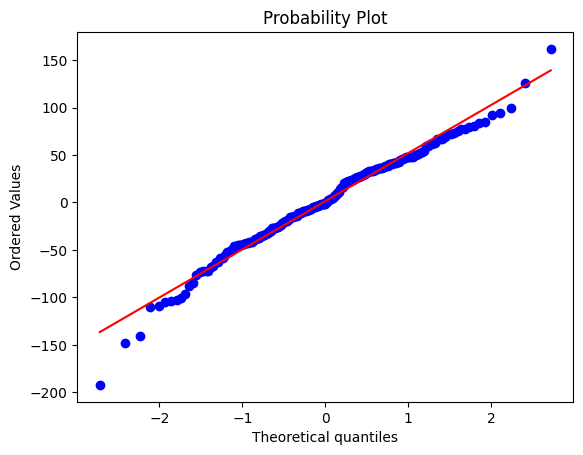

In [ ]:
stats.probplot(gboost_residuals, dist="norm", plot=pylab)
pylab.show()

Key Observations 👀:
- Residuals Centered at 0: This is a good sign, indicating that, on average, the model does not systematically underpredict or overpredict
- KDE Distribution (Gaussian-like): Residuals approximately follow a normal distribution, which supports the assumption that errors are random and independent

Scatterplot of Residuals ♻:
- No clear pattern: Residuals appear randomly distributed around 0
- No heteroscedasticity: Variance in residuals does not systematically increase or decrease with the predicted values

# LSTM

## Import Packages

In [ ]:
# pip install scikeras

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error

## LSTM Model

## Hyper-Parameters

In [ ]:
hyper_parameters = {
    'neurons' : 50,
    'dense' : 25,
    'dropout' : 0.8*0
}

### Activation, Optimizer, Loss, Metrics

- Activation : [https://www.tensorflow.org/api_docs/python/tf/keras/activations]

- Optimizer : [https://www.tensorflow.org/api_docs/python/tf/keras/optimizers]

- Losses : [https://www.tensorflow.org/api_docs/python/tf/keras/losses]

In [ ]:
# Activation Function : 'deserialize', 'elu', 'exponential', 'gelu', 'get', 'hard_sigmoid', 'hard_silu', 'hard_swish', 'leaky_relu', 'linear', 'log_softmax', 'mish', 'relu', 'relu6', 'selu', 'serialize', 'sigmoid', 'silu', 'softmax', 'softplus', 'softsign','swish', 'tanh'
activation_function = 'relu'

# Optimizer Function for the Gradient Descent : 'Adadelta', 'Adafactor', 'Adagrad', 'Adam', 'AdamW', 'Adamax', 'Ftrl', 'Lion', 'LossScaleOptimizer', 'Nadam', 'optimizer_function', 'RMSprop', 'SGD'
optimizer_function = 'adam'

# Loss Function : 'BinaryCrossentropy', 'BinaryFocalCrossentropy', 'CTC' ,'CategoricalCrossentropy', 'CategoricalFocalCrossentropy' ,'CategoricalHinge', 'CosineSimilarity', 'Dice', 'Hinge',' Huber', 'KLDivergence', 'LogCosh','Loss', 'MeanAbsoluteError', 'MeanAbsolutePercentageError', 'MeanSquaredError', 'MeanSquaredLogarithmicError', 'Poisson', 'Reduction' ,'SparseCategoricalCrossentropy', 'SquaredHinge', 'Tversky'
loss_function = 'MeanAbsoluteError'

# Metric Function : 'accuray'
metrics_function = ['accuracy']

### Sequences & Spliting Data

In [ ]:
# Data we want to predict
lstm_asset = '^GSPC'
lstm_src ='Close'
lstm_target_data = clean_data[(lstm_src, lstm_asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Log Returns', '^GSPC')]).values  # Other colomns as Features
lstm_features = clean_data[
    [
        ('Open', '^GSPC'),
        ('High', '^GSPC'),
        ('Low', '^GSPC'),
        ('Adj Close', 'DX-Y.NYB'),
        ('Adj Close', '^IXIC'),
        ('Adj Close', 'CL=F'),
        ('Adj Close', 'GC=F'),
        ('^GSPC', 'SMA_20'),
        ('^GSPC', 'Upper_Band'),
        ('^GSPC', 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
lstm_scaler = MinMaxScaler(feature_range=(0, 1))
lstm_scaled_data = lstm_scaler.fit_transform(np.hstack((lstm_target_data.reshape(-1, 1), lstm_features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
lstm_X, lstm_y = create_sequences(lstm_scaled_data[:, 1:], lstm_scaled_data[:, 0], lag)

# Data Split into Train & Test Data
lstm_X_train, lstm_X_test, lstm_y_train, lstm_y_test = train_test_split(lstm_X, lstm_y, test_size=0.2, random_state=42)

# Data Dimensions
print("Dimensions de X_train :", lstm_X_train.shape)  # (samples, lag, features)

Dimensions de X_train : (756, 100, 10)


In [ ]:
# Creation of LSTM model
lstm_model = Sequential([
    LSTM(
        hyper_parameters['neurons'],
        return_sequences=True,
        input_shape=(lstm_X_train.shape[1], lstm_X_train.shape[2])
    ),

    Dropout(hyper_parameters['dropout']),

    LSTM(
        hyper_parameters['neurons'],
        return_sequences=False
    ),

    Dropout(hyper_parameters['dropout']),
    Dense(hyper_parameters['dense'], activation=activation_function),
    Dense(1)  # One output (Log Returns)
])

# Compilation
lstm_model.compile(optimizer=optimizer_function, loss=loss_function)

# Train
history = lstm_model.fit(
    lstm_X_train,
    lstm_y_train,
    batch_size=32,
    epochs=20,
    validation_data=(lstm_X_test, lstm_y_test),
    verbose=1
)

# Predictions
lstm_y_pred = lstm_model.predict(lstm_X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - loss: 0.1913 - val_loss: 0.0345
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 94ms/step - loss: 0.0379 - val_loss: 0.0278
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0254 - val_loss: 0.0259
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - loss: 0.0252 - val_loss: 0.0306
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0287 - val_loss: 0.0272
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0270 - val_loss: 0.0244
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - loss: 0.0304 - val_loss: 0.0253
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - loss: 0.0291 - val_loss: 0.0238
Epoch 9/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0256 - val_loss: 0.0233
Epoch 10/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0216 - val_loss: 0.0277
Epoch 11/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - loss: 0.0229 - val_loss: 0.0241
Epoch 12/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - loss: 0.0

### Denormalization of Data

In [ ]:
# # Inverse normalization
# y_pred = scaler.inverse_transform(
#     np.hstack(
#         (
#             y_pred,
#             np.zeros(
#                 (y_pred.shape[0],
#                  scaled_data.shape[1] - 1)
#             )
#         )
#     )
# )[:, 0]

# y_test_rescaled = scaler.inverse_transform(
#     np.hstack(
#         (
#             y_test.reshape(-1, 1),
#             np.zeros(
#                 (
#                     y_test.shape[0],
#                     scaled_data.shape[1] - 1)
#             )
#         )
#     )
# )[:, 0]

### RSME & MAE (Evaluation)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Mean Squared Error (MSE), for Train: 0.0006770268954841508
Mean Absolute Error (MAE), for Train: 0.02102803577901547 

Mean Squared Error (MSE), for Test: 0.000873885720257806
Mean Absolute Error (MAE), for Test: 0.02273133018105508 

Mean Squared Error (MSE), naive methode: 0.08469190727640981
Mean Absolute Error (MAE), naive methode: 0.226558246033159 

MSE Ratio : MSE Prediction over MSE Train (MSER): 1.2907695781168027
MAE Ratio : MAE Prediction over MAE Train (MAER): 1.0810011177429792


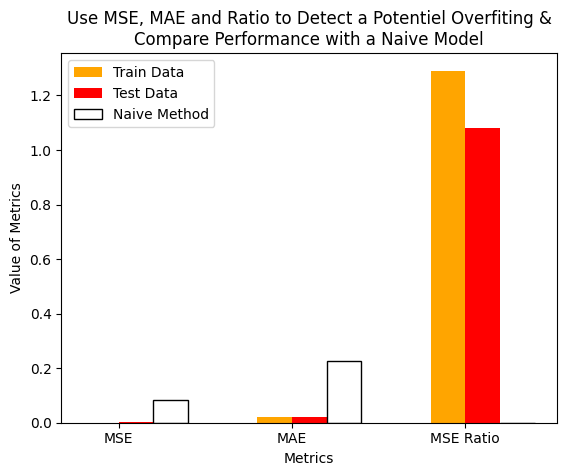

<Figure size 800x600 with 0 Axes>

In [ ]:
evaluation_rmse_mae(lstm_model, lstm_X_train, lstm_y_train, lstm_y_test, lstm_y_pred)

### Ploting Predictions

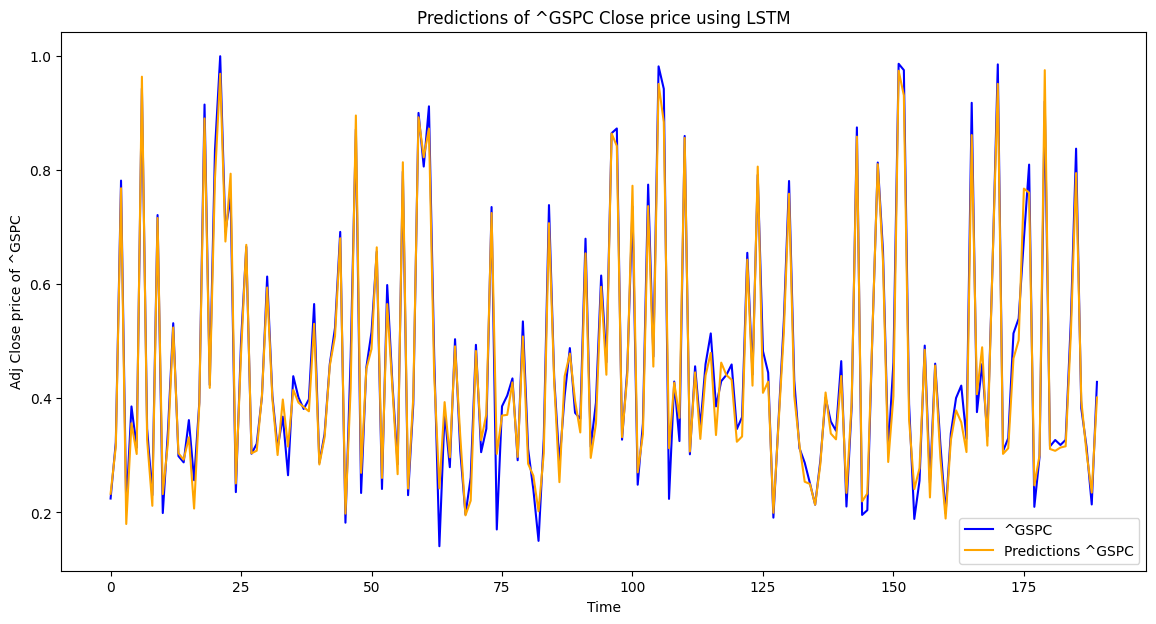

In [ ]:
# Visualization of predictions vs Log Returns
plt.figure(figsize=(14, 7))
plt.plot(lstm_y_test, label=f'{lstm_asset}', color='blue')
plt.plot(lstm_y_pred, label=f'Predictions {lstm_asset}', color='orange')
plt.title(f'Predictions of {lstm_asset} {lstm_src} price using LSTM')
plt.xlabel('Time')
plt.ylabel(f'{src} price of {lstm_asset}')
plt.legend()
plt.show()

## LSTM : Cross-Validation

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []

# Define the model function
def build_model():

  lstm_model = Sequential([
  LSTM(
      hyper_parameters['neurons'],
      return_sequences=True,
      input_shape=(lstm_X_train.shape[1], lstm_X_train.shape[2])
  ),

  Dropout(hyper_parameters['dropout']),

  LSTM(
      hyper_parameters['neurons'],
      return_sequences=False
  ),

  Dropout(hyper_parameters['dropout']),
  Dense(hyper_parameters['dense'], activation=activation_function),
  Dense(1)  # One output (Log Returns)
  ])

  # Compilation
  lstm_model.compile(optimizer=optimizer_function, loss=loss_function)

  return lstm_model

for train_index, test_index in kf.split(lstm_X):
    lstm_X_train, lstm_X_test = lstm_X[train_index], lstm_X[test_index]
    lstm_y_train, lstm_y_test = lstm_y[train_index], lstm_y[test_index]

    # Build and train the model
    lstm_model = build_model()
    lstm_model.fit(lstm_X_train, lstm_y_train, epochs=10, batch_size=32, verbose=0)

    # Predict and calculate MSE
    lstm_y_pred = lstm_model.predict(lstm_X_test)
    mse = mean_squared_error(lstm_y_test, lstm_y_pred)
    mse_scores.append(mse)

# Print results
print(f"Cross-Validation MSE Scores: {mse_scores}")
print(f"Average CV MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of CV MSE: {np.std(mse_scores)}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step
Cross-Validation MSE Scores: [0.005722862224215539, 0.0016105624350655084, 0.28444002661822754, 0.0021958496714746785, 0.28385324033754195]
Average CV MSE: 0.11556450825730505
Standard Deviation of CV MSE: 0.13765404445065246


## LSTM : Residuals

### Distribution and Scatter Plot

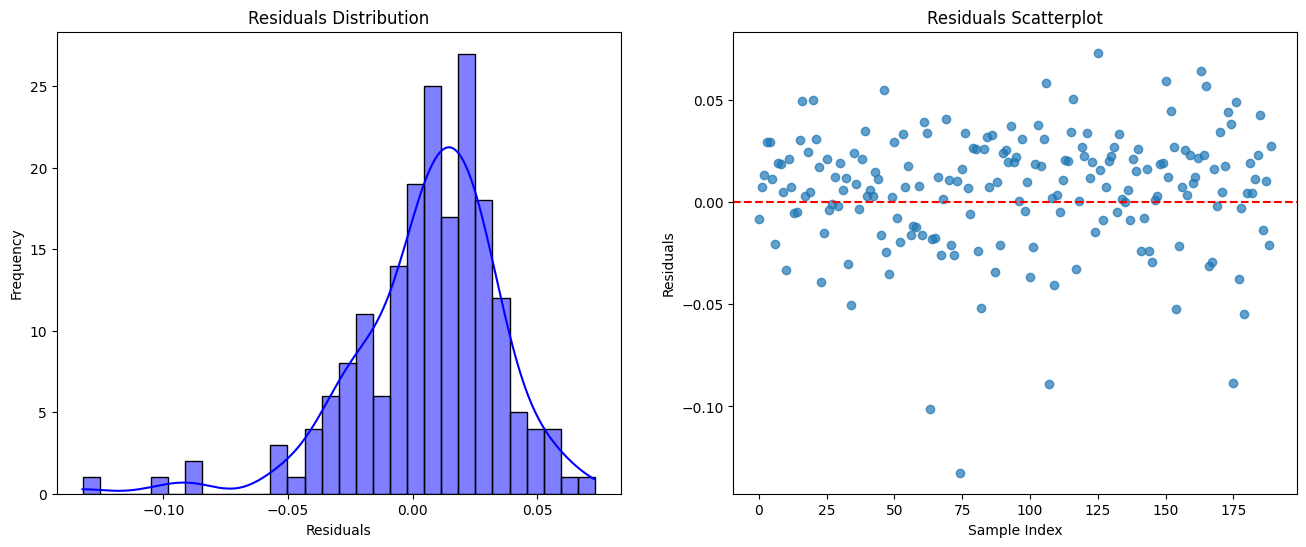

Mean of residuals: 0.006308051183090521
Standard deviation of residuals: 0.028880689232241605


In [ ]:
# Calculate residuals
lstm_y_pred = lstm_y_pred.flatten()  # Converts (209, 1) to (209,)
lstm_residuals = lstm_y_test - lstm_y_pred

# Size of Graphs
plt.figure(figsize=(16, 6))

# Residuals distribution
plt.subplot(1, 2, 1)
sns.histplot(lstm_residuals, kde=True, bins=30, color="blue")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")

# Residuals scatterplot
plt.subplot(1, 2, 2)
plt.scatter(range(len(lstm_residuals)), lstm_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residuals Scatterplot")
plt.xlabel("Sample Index")
plt.ylabel("Residuals")

plt.show()

# Normality check
print("Mean of residuals:", np.mean(lstm_residuals))
print("Standard deviation of residuals:", np.std(lstm_residuals))

### QQ-Plot

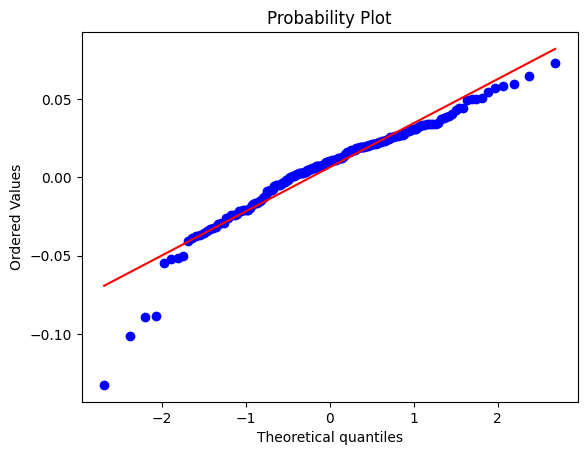

In [ ]:
stats.probplot(lstm_residuals, dist="norm", plot=pylab)
pylab.show()

## LSTM : Some other Overfiting Tests

### Asset for Test

In [ ]:
# Data we want to predict
asset = 'BLK' # TESLA
asset_src = 'Adj Close'
targeted_data = clean_data[(asset_src, asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Close', '^TNX')]).values  # Other colomns as Features
features = clean_data[
    [
        ('Open', asset),
        ('High', asset),
        ('Low', asset),
        ('Adj Close', 'DX-Y.NYB'),
        ('Adj Close', '^IXIC'),
        ('Adj Close', 'CL=F'),
        ('Adj Close', 'GC=F'),
        (asset, 'SMA_20'),
        (asset, 'Upper_Band'),
        (asset, 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.hstack((targeted_data.reshape(-1, 1), features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
X_asset, y_asset = create_sequences(scaled_data[:, 1:], scaled_data[:, 0], lag)

y_pred_asset = lstm_model.predict(X_asset)

30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step


### Reference Asset (S&P500)

In [ ]:
# Data we want to predict
ref_asset = '^GSPC'
ref_src = 'Adj Close'
targeted_data = clean_data[(ref_src, ref_asset)].values  # Targeted Data
# features = clean_data.drop(columns=[('Close', '^GSPC')]).values  # Other colomns as Features
features = clean_data[
    [
        ('Open', ref_asset),
        ('High', ref_asset),
        ('Low', ref_asset),
        ('Adj Close', 'DX-Y.NYB'),
        ('Adj Close', '^IXIC'),
        ('Adj Close', 'CL=F'),
        ('Adj Close', 'GC=F'),
        (ref_asset, 'SMA_20'),
        (ref_asset, 'Upper_Band'),
        (ref_asset, 'Lower_Band'),
    ]
].values  # Other colomns as Features

# Data Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(np.hstack((targeted_data.reshape(-1, 1), features)))

# Function to create sequences with lag of the ADF Test & ACF Function
def create_sequences(data, target, lag):
    X, y = [], []
    for i in range(lag, len(data)):
        X.append(data[i-lag:i])  # Sequences with `lag` : [t - lag; t]
        y.append(target[i])  # Present Value (t+1)
    return np.array(X), np.array(y)

# Creation of Sequences
lag = 100
X_ref, y_ref = create_sequences(scaled_data[:, 1:], scaled_data[:, 0], lag)

y_pred_ref = lstm_model.predict(X_ref)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step


### Ploting results

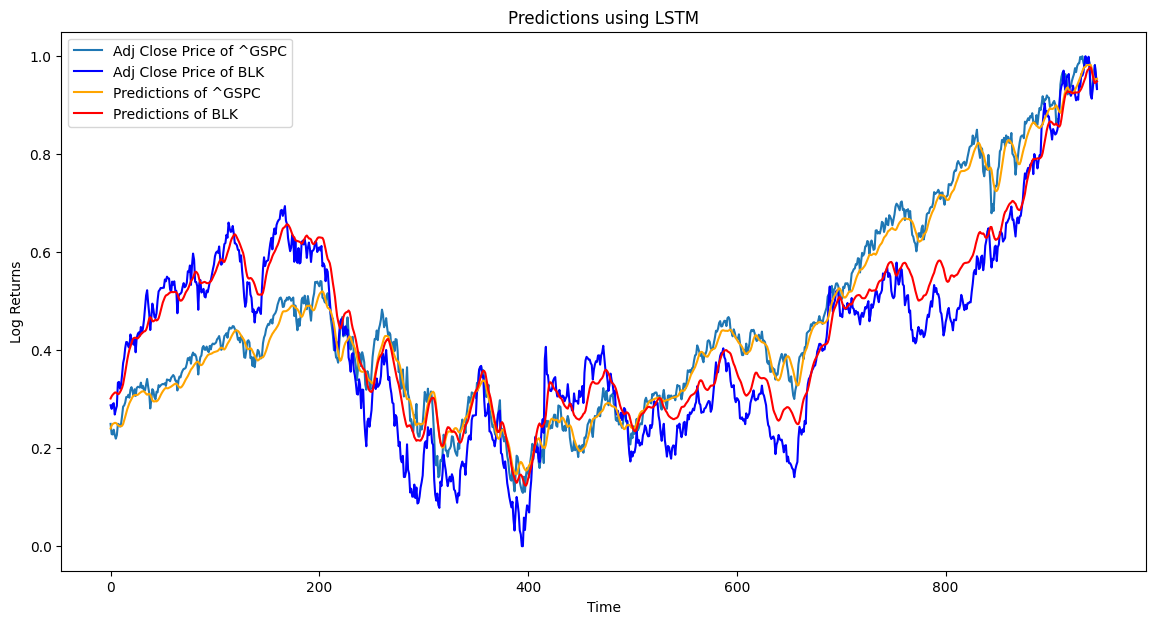

In [ ]:
# Visualization of predictions vs Log Returns
plt.figure(figsize=(14, 7))
plt.plot(y_ref, label=f'{ref_src} Price of {ref_asset}')
plt.plot(y_asset, label=f'{asset_src} Price of {asset}', color='blue')
plt.plot(y_pred_ref, label=f'Predictions of {ref_asset}', color='orange')
plt.plot(y_pred_asset, label=f'Predictions of {asset}', color='red')
plt.title('Predictions using LSTM')
plt.xlabel('Time')
plt.ylabel('Log Returns')
plt.legend()
plt.show()

2 possible cases :

- The 2 predictions look the same. In that case, as assets should differents, it means the model overfited during the training : he learnt every price and entry does not change the output price

- The 2 predictions are VERY different (chose an asset and a reference asset whose prices do not look similar). In that case, the model did not learn every price during trainin and is able to adapt depending on inputs